In [23]:
#----------------------IMPORT DEPENDENCIES---------------------------
#-------------------
import numpy as np  #LIBRARY TO WORK WITH ARRAYS
import pandas as pd   #LIBRARY TO MAKE DATAFRAMES, DATAFRAMES ARE STRUCTURED TABLES
import matplotlib.pyplot as plt # FOR PLOTTING AS WE NEED TO MAKE SOME DATA ANALYSIS
import seaborn as sns #Seaborn is an open-source Python library built on top of matplotlib.
                        #It is used for data visualization and exploratory data analysis.
                        #Seaborn works easily with dataframes and the Pandas library.
                        #The graphs created can also be customized easily
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor #XGBOOST IS THE LIBRARY
from sklearn import metrics #The sklearn.metrics module implements functions assessing prediction error for specific purposes


In [24]:
#----------------------------------DATA COLLECTION & PROCESSING-----------------------------

In [25]:
#loading data from csv file into pandas dataframe
calories= pd.read_csv("calories.csv")

In [26]:
#print first 5 rows of the dataframe : use head function
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [27]:
exercise_data = pd.read_csv("exercise.csv")

In [28]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [29]:
#Combining 2 dataframes
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)
#here we need only calories column from calories dataframe,
#axis =1 : represents joining column wise

In [30]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [31]:
#checking no of rows and columns
calories_data.shape

(15000, 9)

In [32]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [33]:
#checking for missing values in each column
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [34]:
#----------------------------------------DATA ANALYSIS--------------------------------


In [35]:
#Get some STATISTICAL MEASURES about data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [36]:
# DATA VISUALISATION


In [37]:
# to set a basic theme
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

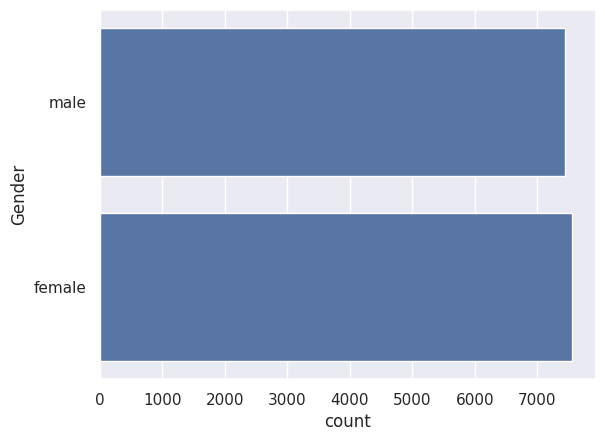

In [38]:
#plotting the gender, which is a ctegorical column , means it has only 2 values
sns.countplot(calories_data['Gender'])

<ipython-input-39-8256c7ecad91>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

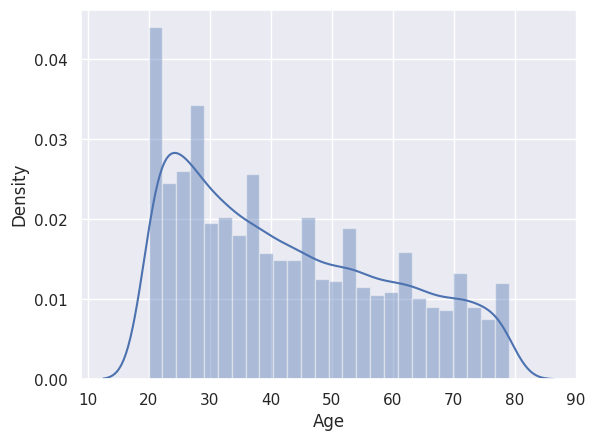

In [39]:
#plotting age, age has distinct values , not categorical
sns.distplot(calories_data['Age'])

<ipython-input-40-69d2efa6e39b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

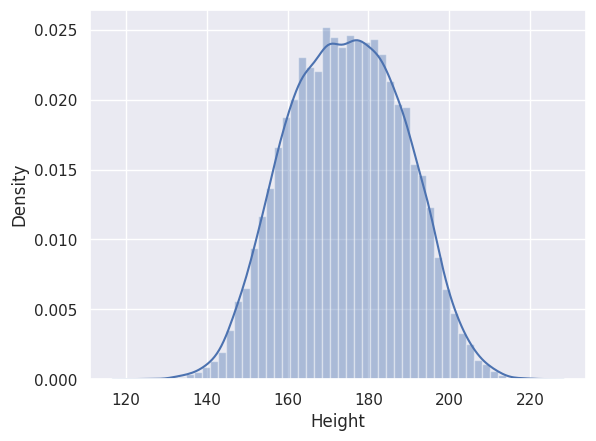

In [40]:
#plotting height, age has distinct values , not categorical
sns.distplot(calories_data['Height'])

<ipython-input-41-dd4653557b0e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

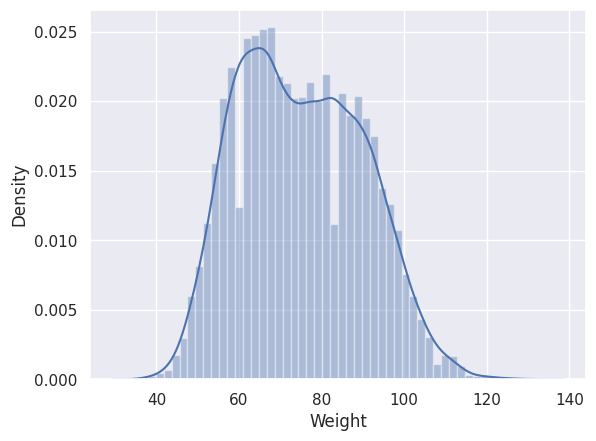

In [41]:
#plotting weight, age has distinct values , not categorical
sns.distplot(calories_data['Weight'])

<ipython-input-42-82f2943c6397>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

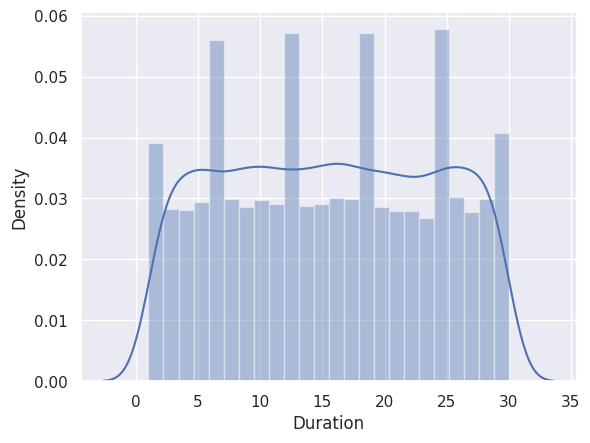

In [42]:
#plotting duration, age has distinct values , not categorical
sns.distplot(calories_data['Duration'])

In [43]:
#--------------FINDING CORRELATION B/W DATASET

In [45]:
numeric_data = calories_data.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)


             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


<Axes: >

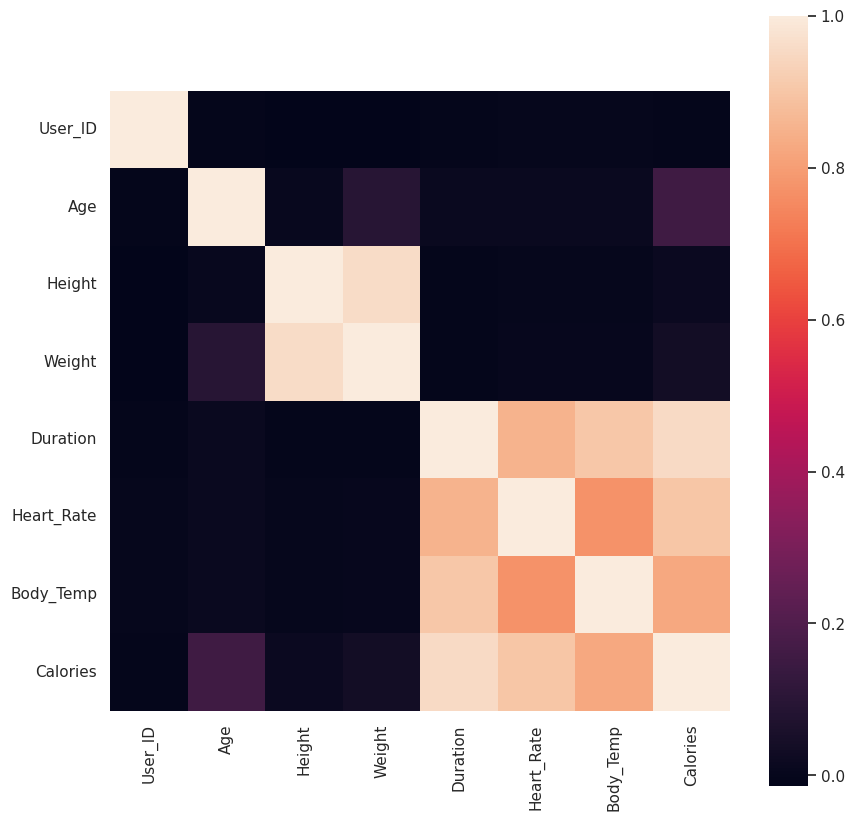

In [46]:
#constructing  a heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square= True, fmt = '.')

In [47]:
#Here we can see that the correlation value between Caories and Heart Rate, Caories and Body Temp are high and b/w 0.8 to 1.
#Means highly correlated

In [48]:
#------Converting Text data to numerical values

In [49]:
calories_data.replace({'Gender': {'male' : 0, 'female' : 1}}, inplace=True)

<ipython-input-49-c1b4781c5584>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender': {'male' : 0, 'female' : 1}}, inplace=True)


In [50]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [51]:
#----------------------------SEPARATING FEATURES AND TARGET-----------------------------

In [52]:
X = calories_data.drop(columns = ['User_ID', 'Calories'], axis =1)
Y= calories_data['Calories']   # conatins only calories column

In [53]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [54]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [55]:
#-------------SPLITTING DATA INTO TRAINING DATA AND TEST DATA

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [59]:
#--------------MODEL TRAINING

In [60]:
#XGBoost Regressor

In [58]:
#load the model
model = XGBRegressor()

In [63]:
pip install --upgrade xgboost


In [65]:
pip install --upgrade scikit-learn


In [66]:
#load the model
model = XGBRegressor()

In [68]:
from xgboost import DMatrix, train

# Convert data to DMatrix format
dtrain = DMatrix(X_train, label=Y_train)

# Define parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'seed': 42,
}

# Train the model
xgb_model = train(params, dtrain, num_boost_round=100)


In [69]:
#EVALUATE MODEL


In [70]:
#Prediction on Test Data
test_data_prediction= model.predict(X_test)

In [71]:
print(test_data_prediction)

[127.84928  221.66112   37.83674  ... 145.80658   23.795254  89.86934 ]


In [72]:
#------------MEAN ABSOLUTE ERROR
mae= metrics.mean_absolute_error(Y_test, test_data_prediction)

In [73]:
print("Mean Absolute Error =", mae)

Mean Absolute Error = 1.2497338334918022
